In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

# Define file path
file_path = r'C:\Users\sidde\Desktop\GOALS\PROJECT\BDA_Lifecycle\DATASET.xlsx'

# Load each sheet into a DataFrame (assuming they are all in one Excel file)
products = pd.read_excel(file_path, sheet_name='products')
orders = pd.read_excel(file_path, sheet_name='orders')
orderdetails = pd.read_excel(file_path, sheet_name='orderdetails')
payments = pd.read_excel(file_path, sheet_name='payments')


In [6]:
# Step 2: Data Preprocessing & Merging Tables
# Merge orders with orderdetails on orderNumber to get details for each order
orders_details = pd.merge(orderdetails, orders, on='orderNumber', how='inner')

# Merge the resulting dataframe with products on productCode to get product details
sales_data = pd.merge(orders_details, products, on='productCode', how='inner')

# Calculate the total price for each product in each order
sales_data['total_price'] = sales_data['quantityOrdered'] * sales_data['priceEach']

In [7]:
# Step 3: Feature Selection for Predicting Sales (total_price)
# Select features that can impact sales: e.g., quantityOrdered, product price (priceEach), and productLine
features = sales_data[['quantityOrdered', 'priceEach']]
target = sales_data['total_price']

In [8]:
# Step 4: Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [9]:
# Step 5: Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
# Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 114744.12093193931
R-squared: 0.9537579725829703


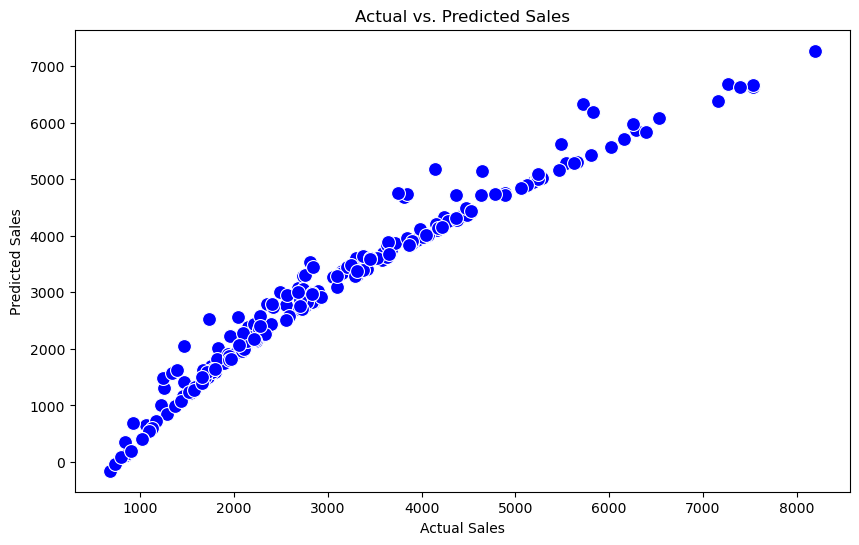

In [11]:
# Visualize the Results
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", edgecolor="w", s=100)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()